# Logistic Regression

Sources: DataCamp, [StatQuest](https://www.youtube.com/watch?v=yIYKR4sgzI8)

Despite its name, logistic regression is used in **classification** problems, not regression problems.
We will see how logreg works with binary classification problems, that is, when we have two possible labels for the target variable.

Given a feature, logreg will output a probability p, with respect to the target variable.

If p is below a certain threshold, we consider the label to be 0, and above that threshold we consider it to be 1. Defining that threshold is our task.

#### Differences with linear regression (StatQuest): 
1) With linear regression you can predict continuous variables (like weight), logistic regression returns the probability of a givenlabel (like "obese").

2) Also, instead of fitting a line to the data, like linear regression, logistic regression fits an "S"-shaped logistic function.

3) We can have simple models (e.g.: Obesity is predicted by Weight) or more complex models ( e.g.: Obesity is predicted by Weight,  Genotype and Age).

We can calculate the influence that each predictor variable has on the target variable, but unlike linear regression, we can't easily compare a complex model to a simple model. 

Instead, we just test to see if a variable's effect on the prediction is significantly different from 0, with Wald's Test.

One big difference between linreg and logreg is how the line is fit to the data. With linreg, we fit the line using least squares. In other words, we find the line that minimizes the sum of the squares of these residuals. We also use residuals to calculate R squared and to compare simple models to complicated models. 

Logreg doesn't have the same concept of a residual, so it can't use least squares and it can't calculate R squared. Instead, it uses something called "maximum likelihood". 

You pick a probability, scaled by weight, of observing an obese mouse, and you use that to calculate the likelihood of observing all of your datapoints. Lastly, you multiplu all of the likelihoods together. That's the likelihood of the data given this line. Then you shift the line and calculate a new likelihood of the data, then shift the line and calculate it again and again. Finally, the curve with the maximum value for the likelihood is selected. 


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [2]:
data = datasets.load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [3]:
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
X = data.data
y = data.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [7]:
logreg = LogisticRegression(solver='liblinear')

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [8]:
print(y_pred)

[0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0
 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0]


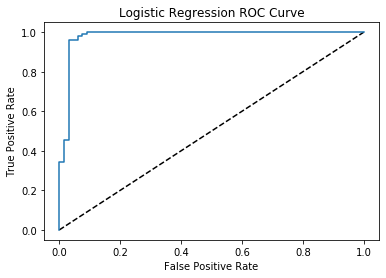

In [9]:
# Now we plot our ROC curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# And we plot it

plt.plot([0, 1], [0, 1], 'k--') # this creates a 45-degree dashed line
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

We used the predicted probabilities of the model assigning a value of 1 to the observation in question. This is because to compute the ROC we do not merely want the predictions on the test set, but we want the probability that our logreg model outputs before using a threshold to predict the label.

To do this, we use the method predict_proba to the model and pass it the test data. predict_proba returns an array with two columns: each column contains the probabilities for the respective target values (0 or 1, negative or positive). We choose the second column, the one with index 1, that is, the probabilities of predicted labels being '1' (positive).

I was curious about this.

In [10]:
see_two_cols_pred_proba = logreg.predict_proba(X_test)
print(see_two_cols_pred_proba)

sum_cols = see_two_cols_pred_proba[:,0] + see_two_cols_pred_proba[:,1]

print(sum_cols)

[[9.99771230e-01 2.28769585e-04]
 [9.03697261e-03 9.90963027e-01]
 [5.08966708e-03 9.94910333e-01]
 [5.43195725e-02 9.45680427e-01]
 [2.37796120e-01 7.62203880e-01]
 [1.54806054e-01 8.45193946e-01]
 [4.50703278e-04 9.99549297e-01]
 [5.22505588e-04 9.99477494e-01]
 [4.58796346e-03 9.95412037e-01]
 [5.10327016e-03 9.94896730e-01]
 [1.87848376e-03 9.98121516e-01]
 [9.95316046e-01 4.68395420e-03]
 [2.84708710e-04 9.99715291e-01]
 [4.88068465e-01 5.11931535e-01]
 [1.16717413e-02 9.88328259e-01]
 [9.88588445e-01 1.14115548e-02]
 [5.36830553e-02 9.46316945e-01]
 [7.24056652e-03 9.92759433e-01]
 [9.25293927e-03 9.90747061e-01]
 [8.04639603e-02 9.19536040e-01]
 [7.95227999e-01 2.04772001e-01]
 [3.54591748e-04 9.99645408e-01]
 [7.93262631e-04 9.99206737e-01]
 [1.51528868e-02 9.84847113e-01]
 [9.99999999e-01 8.99554889e-10]
 [9.99998885e-01 1.11484309e-06]
 [9.99617540e-01 3.82459770e-04]
 [1.34069328e-01 8.65930672e-01]
 [9.66398199e-01 3.36018011e-02]
 [2.25266243e-03 9.97747338e-01]
 [4.411339

As expected, the sum of the probabilities for '0' and '1' equals 1.

We compute the area under the curve

In [11]:
auc = roc_auc_score(y_test, y_pred_prob)

print(auc)

0.9802308802308802


## AUC using cross-validation



In [15]:
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

print(cv_scores)

[0.99418605 0.99192506 0.99698189 0.98289738 0.99664655]


Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC is an informative metric to evaluate a model. If the AUC is significatively greater than 0.5, the model is better than random guessing.